## 자동차 연비 데이터셋

- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)의 [
Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/auto+mpg)에서 다운로드
 
 
- [Kaggle](https://www.kaggle.com/)의
[Auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset)에서 다운로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. 데이터 탐색

#### 1.1 데이터 적재

In [3]:
df = pd.read_csv("datasets/auto-mpg.csv", header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


#### 1.2 데이터 일부 확인

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


0. mpg: continuous
1. cylinders: multi-valued discrete
2. displacement: continuous
3. horsepower: continuous
4. weight: continuous
5. acceleration: continuous
6. model year: multi-valued discrete
7. origin: multi-valued discrete
8. car name: string (unique for each instance)

#### 1.3 열 이름 지정

* 예 : ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

In [5]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

- mpg : 연비
- cylinders : 실린더수 
- displacement : 배기량
- horsepower: 출력
- weight : 차중
- acceleration : 가속능력
- model year : 출시년도
- origin : 제조국 1(USA), 2(EU), 3(JPN)
- name : 모델명

#### 1.4 데이터 형상 확인

In [6]:
df.shape

(398, 9)

#### 1.5 데이터 요약정보 확인(데이터 타입, 누락정보)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### 1.6 데이터 자료형 확인 

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

#### 1.7 Series(horsepower 열)의 자료형 확인 

In [10]:
df["horsepower"].dtypes

dtype('O')

* (Question) horsepower는 숫자 데이터인데 왜 object 형으로 반환되었을까?
* (Answer) 중간에 "?" 데이터 때문에 object 형으로 간주

#### 1.8 제조국(origin) 특성의 데이터 분포(건수) 확인하기
- 1(USA), 2(EU), 3(JPN)

In [11]:
df["origin"].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

#### 1.9 제조국(origin) 특성을 histogram으로 표현하기

<AxesSubplot:>

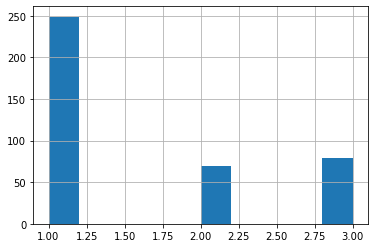

In [12]:
df["origin"].hist()

#### 1.10 coutry 컬럼 추가하기
* 제조국 1, 2, 3을 각각 "USA", "Europe", "Japan"으로 대체한 값 적용

In [13]:
df["country"] = df["origin"].replace([1, 2, 3], ["USA", "Europe", "Japan"])

* coutry 특성으로 groupby하여 "국가당 몇건"의 샘플이 있는지 확인하기

In [15]:
df.groupby("country").size()

country
Europe     70
Japan      79
USA       249
dtype: int64

- 위에서 구한 국가당 레코드수를 파이차트 그리기

In [16]:
tmp = df.groupby("country").size()
type(tmp)

pandas.core.series.Series

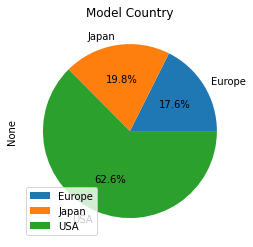

In [21]:
tmp.plot(kind="pie", autopct="%1.1f%%")
plt.title("Model Country")
plt.legend()

#### 1.11 국가별(coutry) mpg 값의 분포를 boxplot으로 확인하기
- (Question) mpg의 중간값이 가장 낮은 국가는?
- (Answer)

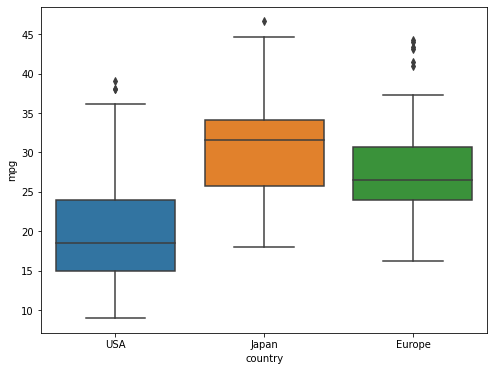

In [24]:
plt.figure(figsize=(8,6))
fig = sns.boxplot(x="country", y="mpg", data=df)

#### 1.12 통계 정보 확인 

In [25]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### 1.13 특성들 간의 상관관계 구하기 

- 상관계수 매트릭스 : df.corr() 이용

In [27]:
corr_mat = df.corr()
corr_mat

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


- (시각화 1) 상관계수 산점도로 시각화 하기 : pd.plotting.scatter matrix()

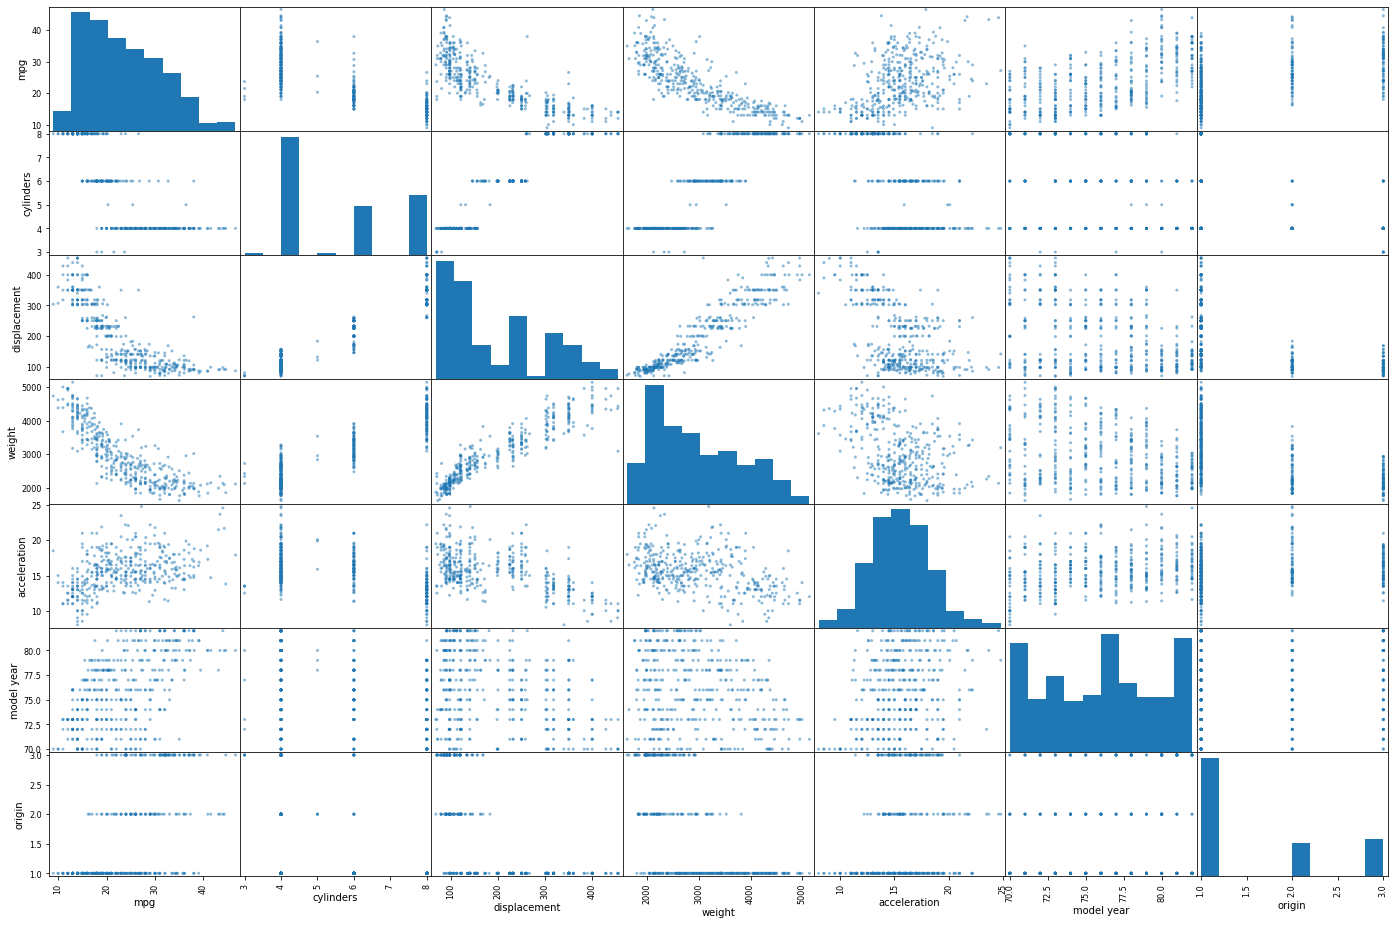

In [31]:
attributes = ['mpg','cylinders','displacement', 'weight', 'acceleration','model year','origin']
m = pd.plotting.scatter_matrix(df[attributes], figsize=(24, 16))

- (시각화 2) 상관계수 히트맵으로 시각화하기

<AxesSubplot:>

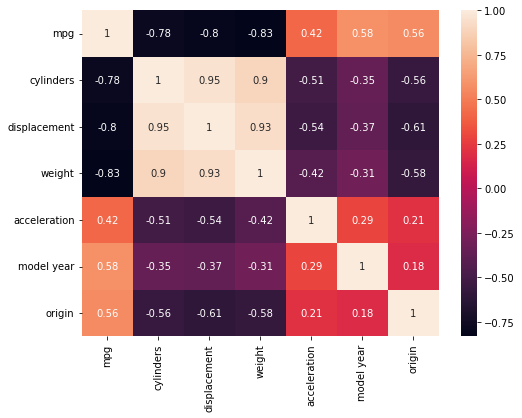

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True)

* (Question) 타깃(mpg)와의 상관계수가 가장 높은 특성은?
* (Answer) weight가 mpg와의 음의 상관관계가 높다.

* [컬러맵 정보](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

- weight 특성과, mpg(타깃) 의 상관관계 및 산점도

In [36]:
df[["weight", "mpg"]].corr()

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


<AxesSubplot:xlabel='weight', ylabel='mpg'>

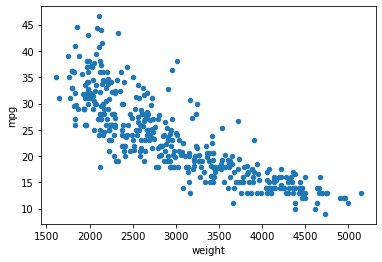

In [37]:
df.plot(kind="scatter", x="weight", y="mpg")

## 2. 데이터 전처리

#### 2.1 누락 데이터 처리하기

- horsepower 열의 ('?')를 np.nan으로 변경

In [39]:
df["horsepower"].replace("?", np.nan, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   country       398 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 31.2+ KB


- 누락 데이터 수 확인

In [41]:
df.isnull().sum() # df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
country         0
dtype: int64

- 누락 데이터 삭제하기 (해당 레코드를 삭제하기, 특성을 삭제하는것이 아님)

In [42]:
df.dropna(subset=["horsepower"], axis=0, inplace=True)

- 데이터 개수 확인 (원본 데이터에서 삭제한 행만큼 줄어있음)

In [43]:
df.count()

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model year      392
origin          392
name            392
country         392
dtype: int64

- horserpower 특성의 데이터 타입(object)을 실수형으로 변환

In [44]:
df["horsepower"] = df["horsepower"].astype("float")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   country       392 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB


#### 2.2 country(또는 origin) 특성을 더미변수로 변환

In [46]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,country
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,USA


- pd.get_dummies

In [50]:
country_dummies = pd.get_dummies(df["country"])
country_dummies

,Europe,Japan,USA
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


- 기존 컬럼 삭제후 새로 만든 dummy 변수를 추가하기

In [55]:
df.drop(["origin", "country"], axis=1, inplace=True)

In [57]:
df = pd.concat([df, country_dummies], axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,name,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,0,0,1


#### 2.3 불필요한 특성 삭제

* 자동차 이름은 예측에 영향을 안줄것으로 판단하여 삭제

In [58]:
df.drop(["name"], axis=1, inplace=True)

In [59]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


#### 2.4 표준화(또는 정규화)로 Scale 조정

- 정규화, 표준화(파이썬 함수)

In [60]:
def minmax_normalize(arr): # 정규화 함수 (0~1사이로)
    return (arr-arr.min())/(arr.max()-arr.min())

def zscore_standize(arr): # 표준화 함수 (평균 0, 표준편차 1로)
    return (arr - arr.mean())/arr.std()

In [61]:
df_scale = df.copy()
df_scale_mm = df_scale.apply(minmax_normalize)
df_scale_zs = df_scale.apply(zscore_standize)

- 정규화, 표준화 (scikit-learn 제공 변환기)

In [ ]:
# StandardScaler()
# MinMaxScaler()

#### 2.5 특성과 Lable 분리

In [63]:
X = df_scale_zs.drop("mpg", axis=1)
y = df_scale_zs["mpg"].copy()

#### 2.6 train set과 test set 분리

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # scaled version

## 3. 모델  선택과 훈련

#### 3.1 LinearRegression 훈련

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [71]:
lin_reg_r2 = lin_reg.score(X_test, y_test) # LinearRegression : score(X_test, y_test) 함수는 R2 값을 반환
lin_reg_r2

0.7922774714022578

#### 3.2 SGD Regressor 훈련

In [77]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, random_state=42) # 규제 없는 모델, penalty의 default는 l2
sgd_reg.fit(X_train, y_train)

SGDRegressor(penalty=None, random_state=42)

In [78]:
sgd_reg_r2 = sgd_reg.score(X_test, y_test)
sgd_reg_r2

0.7710043190594232

#### 3.3 규제 모델 훈련
* 규제로 인해 모델 파라미터의 값이 줄어들게 됨

In [84]:
sgd_reg_l2 = SGDRegressor(alpha=0.1, penalty='l2', random_state=42)
sgd_reg_l2.fit(X_train, y_train)
sgd_reg_l2_r2 = sgd_reg_l2.score(X_test, y_test)
sgd_reg_l2_r2

0.7715255715645305

#### 3.4 다항 회귀 모델 훈련